# Milestone2


Please put this notebook in the same folder as the training data and unzip the train.json

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss

In [2]:
t = pd.read_json('train.json')

In [3]:
t.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [4]:
testing = pd.read_json('test.json')

In [5]:
testing.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


### Remove outliers

In [6]:
t = t[t['price'] <= np.percentile(t['price'], 99)]
t = t[t['price'] >= np.percentile(t['price'],1)]

In [7]:
t = t[t['latitude'] <= np.percentile(t['latitude'], 99)]
t = t[t['latitude'] >= np.percentile(t['latitude'],1)]

In [8]:
t = t[t['longitude'] <= np.percentile(t['longitude'], 99)]
t = t[t['longitude'] >= np.percentile(t['longitude'],1)]

### Features selection

In [136]:
treeModel = DecisionTreeClassifier(max_depth = 5)

In [108]:
X_pred = testing[['bathrooms','bedrooms','latitude','longitude','price']]

#### 0.Naive features

In [109]:
X = t[['bathrooms','bedrooms','latitude','longitude','price']]

In [110]:
y = t['interest_level']

In [137]:
scores = cross_val_score(treeModel,X, y, cv=10,scoring = 'neg_log_loss')

In [138]:
scores

array([-0.69769241, -0.6911518 , -0.69683667, -0.7012486 , -0.70023832,
       -0.69335008, -0.70420534, -0.70304487, -0.70787571, -0.71558961])

In [139]:
scores.mean()

-0.7011233419571752

In [140]:
treeModel.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [141]:
treeModel.score(X,y)

0.7065614653652663

In [142]:
k_range = range(1,15)
cv_scores = []
for n in k_range:
    knn =  DecisionTreeClassifier(max_depth = n)   
    scores = cross_val_score(knn,X,y,cv=10,scoring = 'neg_log_loss')  
    cv_scores.append(scores.mean())


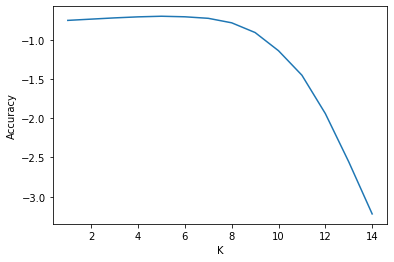

In [143]:
plt.plot(k_range,cv_scores)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [147]:
cv_scores

[-0.7539234806763726,
 -0.7378633484525763,
 -0.7219866359278967,
 -0.7089518160678908,
 -0.7011233419571752,
 -0.7081352931431085,
 -0.7275244697546863,
 -0.7848188935210064,
 -0.9086983293969981,
 -1.1405033545846872,
 -1.452537920846932,
 -1.941124448668581,
 -2.5560341696713946,
 -3.2197010247160804]

In [19]:
#treeModel.score(X_train,y_train)

In [26]:
# predLable = cross_val_predict(treeModel,X,y,cv=10)

In [118]:
predLable

array([[0.04309361, 0.70605023, 0.25085616],
       [0.23913043, 0.34949833, 0.41137124],
       [0.20364742, 0.3768997 , 0.41945289],
       ...,
       [0.08896272, 0.61203396, 0.29900332],
       [0.01162791, 0.89892665, 0.08944544],
       [0.13010408, 0.47477982, 0.39511609]])

In [127]:
predLable = treeModel.predict_proba(X_pred)

In [148]:
labels2idx = {label: i for i, label in enumerate(treeModel.classes_)}

In [149]:
sub = pd.DataFrame()
sub["listing_id"] = testing["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = predLable[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)

loss: 0.87612(6)
0.71082(5) 9.34063(30)0.72041(4)

In [1]:
#from sklearn.svm import SVC

In [ ]:
#clf = SVC(kernel='linear', C=1).fit(X_train, y_train)

In [18]:
from sklearn.linear_model import LogisticRegression

In [150]:
clf = LogisticRegression(random_state=0,multi_class = 'auto',solver='liblinear')

In [151]:
scores = cross_val_score(clf,X, y, cv=10,scoring = 'neg_log_loss')

In [153]:
scores.mean()

-0.7228851982190388

In [154]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
clf.score(X,y)

0.6980478995571225

In [157]:
clf.predict_proba(X_pred)

array([[0.06039464, 0.71819879, 0.22140657],
       [0.11051497, 0.58217298, 0.30731204],
       [0.06437697, 0.72781463, 0.2078084 ],
       ...,
       [0.05823605, 0.74261914, 0.19914481],
       [0.00383001, 0.92137439, 0.0747956 ],
       [0.0349658 , 0.75463288, 0.21040133]])

In [158]:
sub = pd.DataFrame()
sub["listing_id"] = testing["listing_id"]
for label in ["high", "medium", "low"]:
    sub[label] = predLable[:, labels2idx[label]]
sub.to_csv("submission_rf.csv", index=False)

1.00929